In [129]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path(os.environ['AVES_ROOT'])

DATA_PATH = AVES_ROOT / "data" / "external" / "hito"
PROCESSED_PATH = AVES_ROOT / "data" / "processed"

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()
os.getcwd()


'/home/ksmnt/Universidad/CC5208/aves/notebooks/vis-course/2024-otoño'

In [131]:

ciclovias_2021 = gpd.read_file(DATA_PATH / "Evaluación_de_la_Red_de_Ciclovías_del_Gran_Santiago_según_el_Decreto_102.geojson" )
df_2021_sin = gpd.read_file( DATA_PATH / "siniestros_bicicletas" / "geojson" / "Siniestros_con_participación_de_bicicletas,_RM_Chile,_2021..geojson")


Se carga el archivo GeoJSON de las ciclovías

<Axes: >

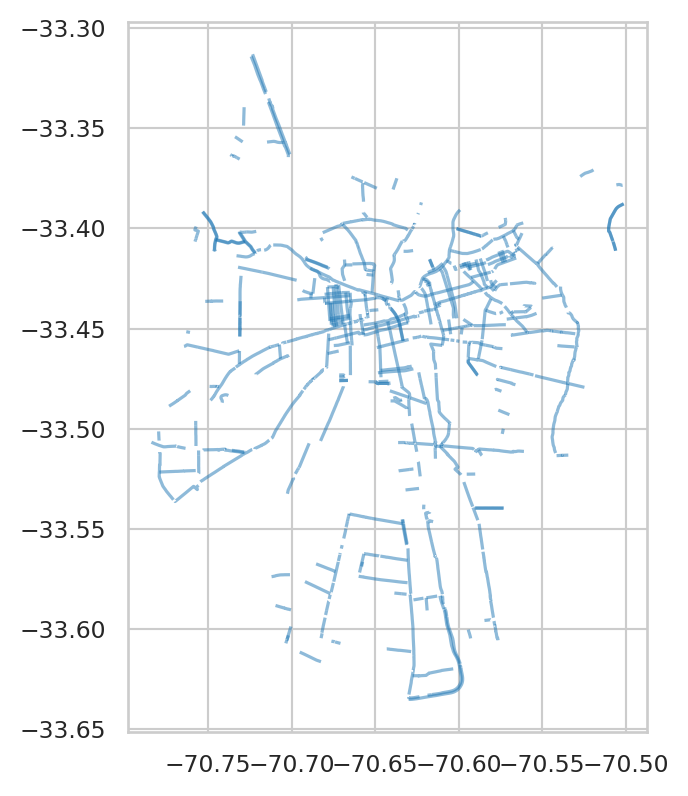

In [132]:
ciclovias_2021.plot(markersize=1, marker='.', alpha=0.5)

In [133]:
zones = (
    gpd.read_file(PROCESSED_PATH / "scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(ciclovias_2021.crs)
)
zones.head()

,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."


<Axes: >

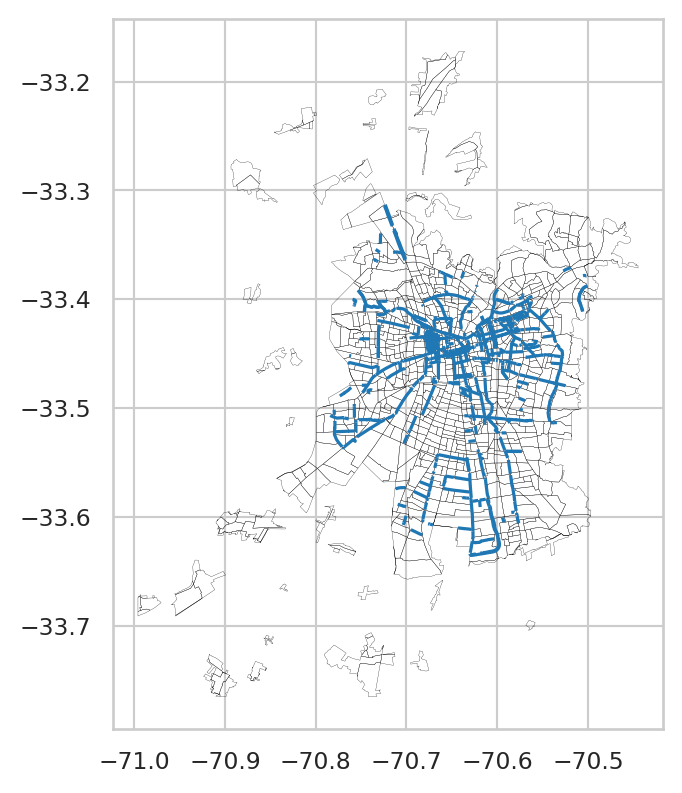

In [145]:
ax = ciclovias_2021.plot(linewidth=0.5)
zones.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.1)